# P02_06_EDA

In [1]:
section_fig_main_title = 'P02_06_EDA_'

In [2]:
import os, sys
import requests
from urllib.parse import urljoin, urlparse
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot
from sklearn.metrics import r2_score,mean_absolute_error

In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error

In [4]:
from numpy import mean
import numpy as np
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor

In [5]:
from pandas.plotting import autocorrelation_plot
from sklearn.feature_selection import VarianceThreshold

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [8]:
from sklearn import metrics
import statsmodels.api as sm

## Read Data

the page html file downloaded in Data directory and it is loaded below.

In [9]:
# csv_path = "../Data/Data_ICME_scraped.csv"
# data = pd.read_csv(csv_path, parse_dates=True)

csv_path = "../Data/P02_05_EDA_Data.csv"
data = pd.read_csv(csv_path, parse_dates=True, infer_datetime_format=True)

In [10]:
data.head(2)

,ICME Plasma/Field Start Y/M/D (UT) (b),Evidence of BiDirectional suprathermal Electron strahls (BDE),"""quality"" of the boundary times",Increase in solar wind speed at the upstream disturbance (shock/wave),solar wind speed km/s,Mean magnetic field strength in the ICME,magnetic cloud has been reported,minimum value of the geomagnetic,Mean 1 AU transit speed of the disturbance,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*,Increase in solar wind speed at the upstream disturbance (shock/wave)*,magnetic cloud has been reported*,minimum value of the geomagnetic*,Mean 1 AU transit speed of the disturbance*
0,1996-05-27 15:00:00,N,2,0,370,9,2,-33,...,No,2.0,no Evidence,0,magnetic cloud has been reported,-33,0
1,1996-07-01 18:00:00,N,3,40,360,11,2,-20,...,No,3.0,no Evidence,40,magnetic cloud has been reported,-20,0


In [11]:
keep_cols = ['ICME Plasma/Field Start Y/M/D (UT) (b)',
             'solar wind speed km/s',
       'forward fast shock happens', '"quality" of the boundary times*',
       'Evidence of BiDirectional suprathermal Electron strahls (BDE)*',
       'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
       'magnetic cloud has been reported*',
       'minimum value of the geomagnetic*',
       'Mean 1 AU transit speed of the disturbance*']
data = data[keep_cols]

In [12]:
data.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),solar wind speed km/s,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*,Increase in solar wind speed at the upstream disturbance (shock/wave)*,magnetic cloud has been reported*,minimum value of the geomagnetic*,Mean 1 AU transit speed of the disturbance*
0,1996-05-27 15:00:00,370,No,2.0,no Evidence,0,magnetic cloud has been reported,-33,0
1,1996-07-01 18:00:00,360,No,3.0,no Evidence,40,magnetic cloud has been reported,-20,0
2,1996-08-07 12:00:00,350,No,2.0,no Evidence,10,magnetic cloud has been reported,-23,0
3,1996-12-23 17:00:00,360,No,2.0,no Evidence,20,magnetic cloud has been reported,-18,435
4,1997-01-10 04:00:00,450,Yes,1.0,some Evidence,100,magnetic cloud has been reported,-78,507


In [13]:
for col in data.columns:
    if col != 'ICME Plasma/Field Start Y/M/D (UT) (b)':
        print(f'{col} = ', data[col].nunique(),'\n')
        print(f'{col} = ', data[col].unique(), '\n\n')

solar wind speed km/s =  51 

solar wind speed km/s =  [ 370  360  350  450  460  340  380  400  390  410  440  430  500  510
  530  320  520  550  470  650  420  640  570  540  490  670  620  480
  560  610  780  740  580  600  790  290  730  330  720  590  680 1300
  800  870  630  810  900  750  310  660  300] 


forward fast shock happens =  2 

forward fast shock happens =  ['No' 'Yes'] 


"quality" of the boundary times* =  5 

"quality" of the boundary times* =  [2.  3.  1.  2.5 3.5] 


Evidence of BiDirectional suprathermal Electron strahls (BDE)* =  3 

Evidence of BiDirectional suprathermal Electron strahls (BDE)* =  ['no Evidence' 'some Evidence' nan
 'intense solar energetic particle event was in progress at the time of ICME passage and electron flows therefore cannot be determined'] 


Increase in solar wind speed at the upstream disturbance (shock/wave)* =  38 

Increase in solar wind speed at the upstream disturbance (shock/wave)* =  [  0  40  10  20 100  90 150  70  30 

In [14]:
data.columns

Index(['ICME Plasma/Field Start Y/M/D (UT) (b)', 'solar wind speed km/s',
       'forward fast shock happens', '"quality" of the boundary times*',
       'Evidence of BiDirectional suprathermal Electron strahls (BDE)*',
       'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
       'magnetic cloud has been reported*',
       'minimum value of the geomagnetic*',
       'Mean 1 AU transit speed of the disturbance*'],
      dtype='object')

# Remove Missing Values

In [15]:
cols = ['solar wind speed km/s',
       'Evidence of BiDirectional suprathermal Electron strahls (BDE)*',
       'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
       'minimum value of the geomagnetic*',
       'Mean 1 AU transit speed of the disturbance*',
       ]

# summarize the shape of the raw data
print(data.shape)
# replace '0' values with 'nan'
data[cols] = data[cols].replace(0, np.nan)
# drop rows with missing values
data.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(data.shape)

(513, 9)
(193, 9)


# Check out data for duplicates

In [21]:
# calculate duplicates
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(data[dups])

False
Empty DataFrame
Columns: [ICME Plasma/Field Start Y/M/D (UT) (b), solar wind speed km/s, forward fast shock happens, "quality" of the boundary times*, Evidence of BiDirectional suprathermal Electron strahls (BDE)*, Increase in solar wind speed at the upstream disturbance (shock/wave)*, magnetic cloud has been reported*, minimum value of the geomagnetic*, Mean 1 AU transit speed of the disturbance*]
Index: []


No duplicate exist in data set

In [22]:
print(data.shape)
# delete duplicate rows
data.drop_duplicates(inplace=True)
print(data.shape)

(193, 9)
(193, 9)


# Check out columns unique values percentage

In [23]:
uniq_index = list(data.nunique().index)
uniq_values = list(data.nunique())
num_rows = data.shape[0]

uniq_percent = [(val*100)/num_rows for val in uniq_values]
for i, uniq in enumerate(uniq_percent):
    print(uniq_index[i])
    print(round(uniq, 2))

ICME Plasma/Field Start Y/M/D (UT) (b)
100.0
solar wind speed km/s
22.8
forward fast shock happens
1.04
"quality" of the boundary times*
2.59
Evidence of BiDirectional suprathermal Electron strahls (BDE)*
1.55
Increase in solar wind speed at the upstream disturbance (shock/wave)*
16.58
magnetic cloud has been reported*
2.07
minimum value of the geomagnetic*
66.84
Mean 1 AU transit speed of the disturbance*
58.55


# Data distribution

checking out the data skewness and distribution

In [25]:
data.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),solar wind speed km/s,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*,Increase in solar wind speed at the upstream disturbance (shock/wave)*,magnetic cloud has been reported*,minimum value of the geomagnetic*,Mean 1 AU transit speed of the disturbance*
3,1996-12-23 17:00:00,360,No,2.0,no Evidence,20.0,magnetic cloud has been reported,-18.0,435.0
4,1997-01-10 04:00:00,450,Yes,1.0,some Evidence,100.0,magnetic cloud has been reported,-78.0,507.0
5,1997-02-10 02:00:00,450,Yes,2.0,some Evidence,90.0,magnetic cloud has been reported,-68.0,683.0
6,1997-04-11 06:00:00,460,No,1.0,some Evidence,150.0,magnetic cloud has been reported,-82.0,552.0
8,1997-05-15 09:00:00,450,Yes,1.0,no Evidence,150.0,magnetic cloud has been reported,-115.0,616.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 3 to 438
Data columns (total 9 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   ICME Plasma/Field Start Y/M/D (UT) (b)                                  193 non-null    object 
 1   solar wind speed km/s                                                   193 non-null    int64  
 2   forward fast shock happens                                              193 non-null    object 
 3   "quality" of the boundary times*                                        193 non-null    float64
 4   Evidence of BiDirectional suprathermal Electron strahls (BDE)*          193 non-null    object 
 5   Increase in solar wind speed at the upstream disturbance (shock/wave)*  193 non-null    float64
 6   magnetic cloud has been reported*                                       193 non-nul

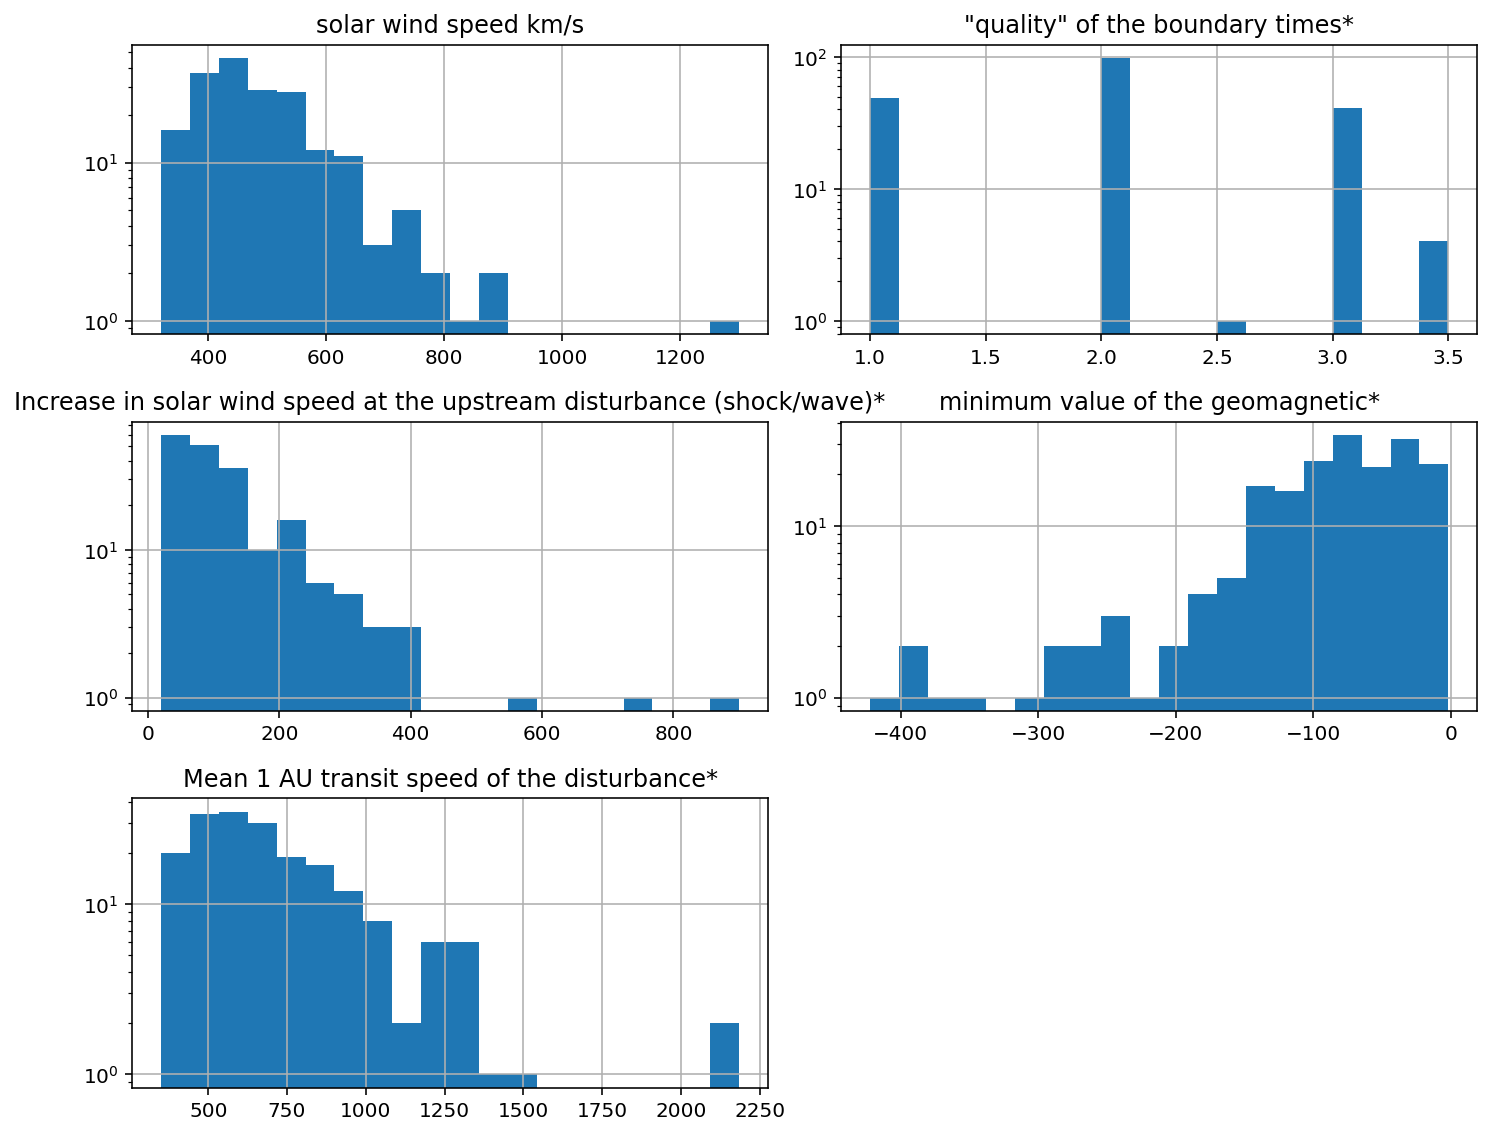

In [27]:
data.hist(bins=20, 
            figsize=(10,8), 
            log=True,
           )

plt.tight_layout()
plt.show()

data distribution is skewed and is semi gaussian

# Automatic Outlier Detection using Local Outlier Factor (LOF)

In [28]:
cols_trans = [
                'solar wind speed km/s', 
                '"quality" of the boundary times*',
                'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
                'minimum value of the geomagnetic*',
                'Mean 1 AU transit speed of the disturbance*'
            ]
data_3 = data[cols_trans]

applying transform on train set (67%).




In [29]:
# split into inpiut and output elements
X = data_3.drop(['solar wind speed km/s'], axis=1)
y = data_3['solar wind speed km/s']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

(129, 4) (129,)


# LOF on Training data



In [30]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]

# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(116, 4) (116,)


The number of rows decreased from 335 to 301. 

The auto outlier found 34 outliers

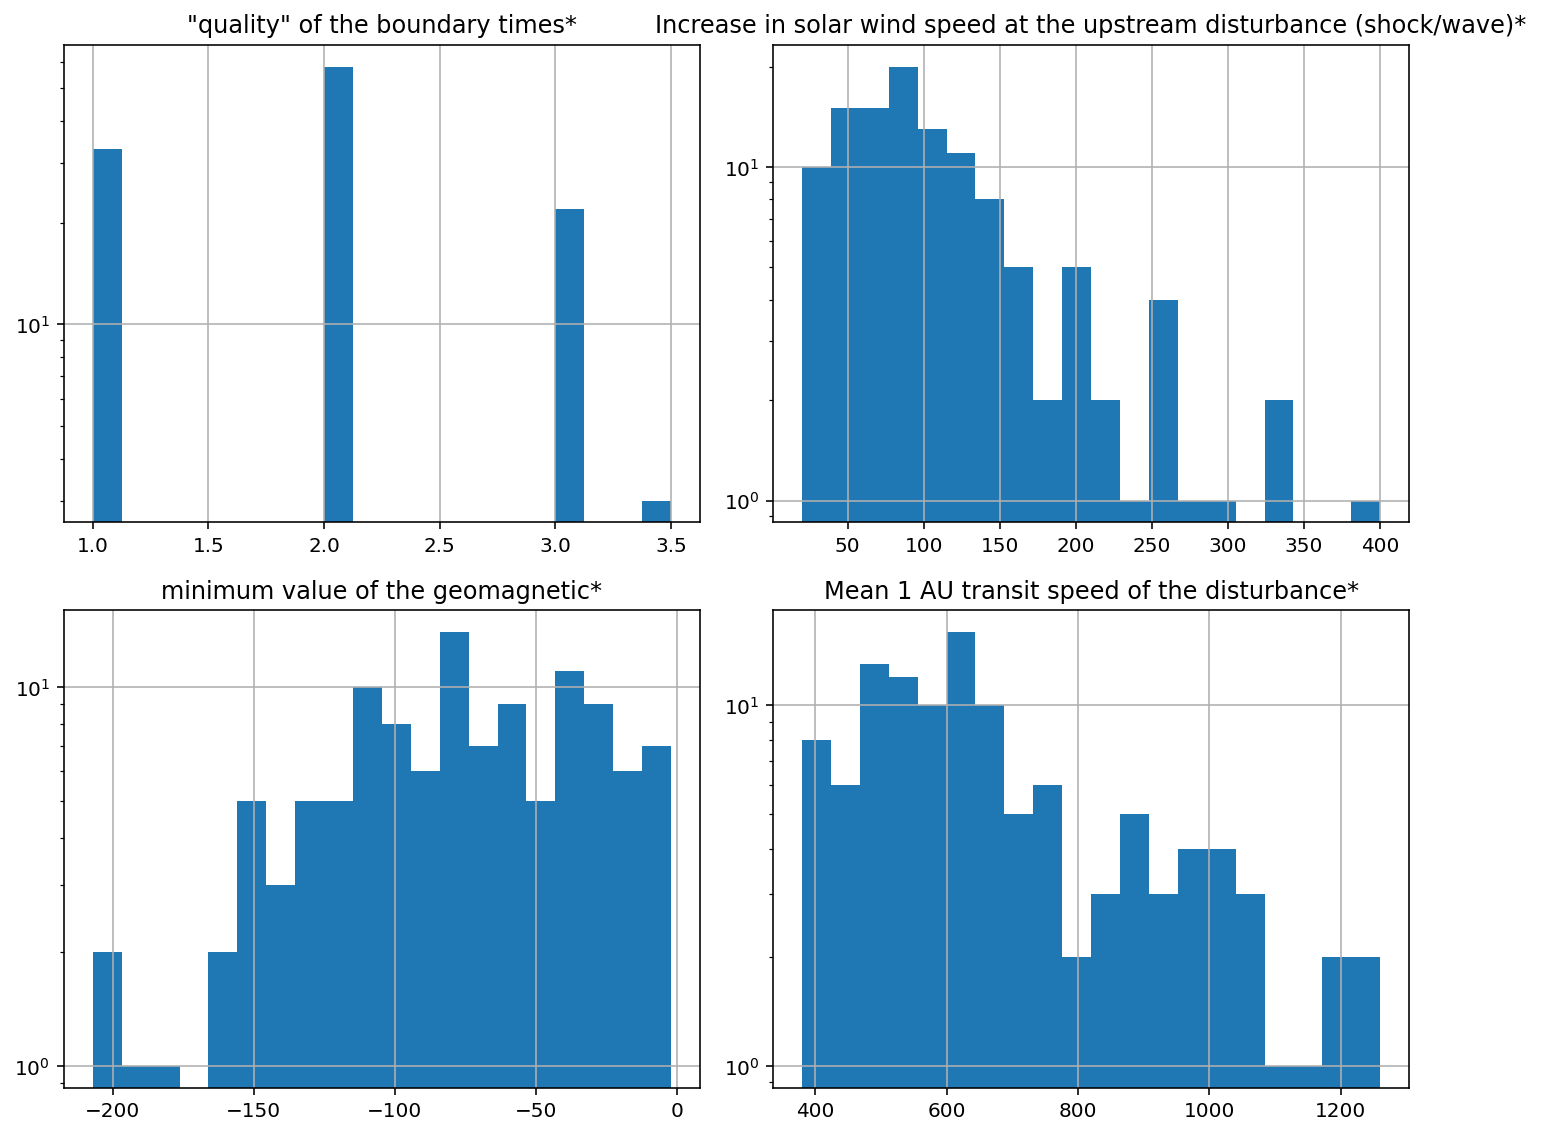

In [31]:
X_train.hist(bins=20, 
            figsize=(10,8), 
            log=True,
           )

plt.tight_layout()
plt.show()

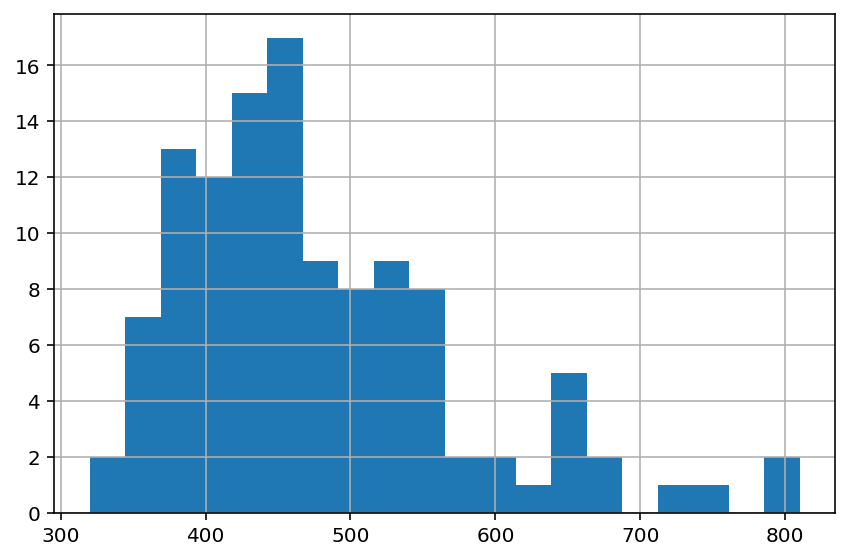

In [32]:
y_train.hist(bins=20, 
#             figsize=(10,8), 
#             log=True,
           )

plt.tight_layout()
plt.show()

### No need to apply LOF on test, Just follow the steps and use model to predict at the end.

# MiniMax transformer and features selection base on variance

In [33]:
steps = list()
steps.append(('scale', MinMaxScaler(feature_range=(1e-5,1))))
pipeline = Pipeline(steps=steps)
X_train_trans_np = pipeline.fit_transform(X_train,y_train)

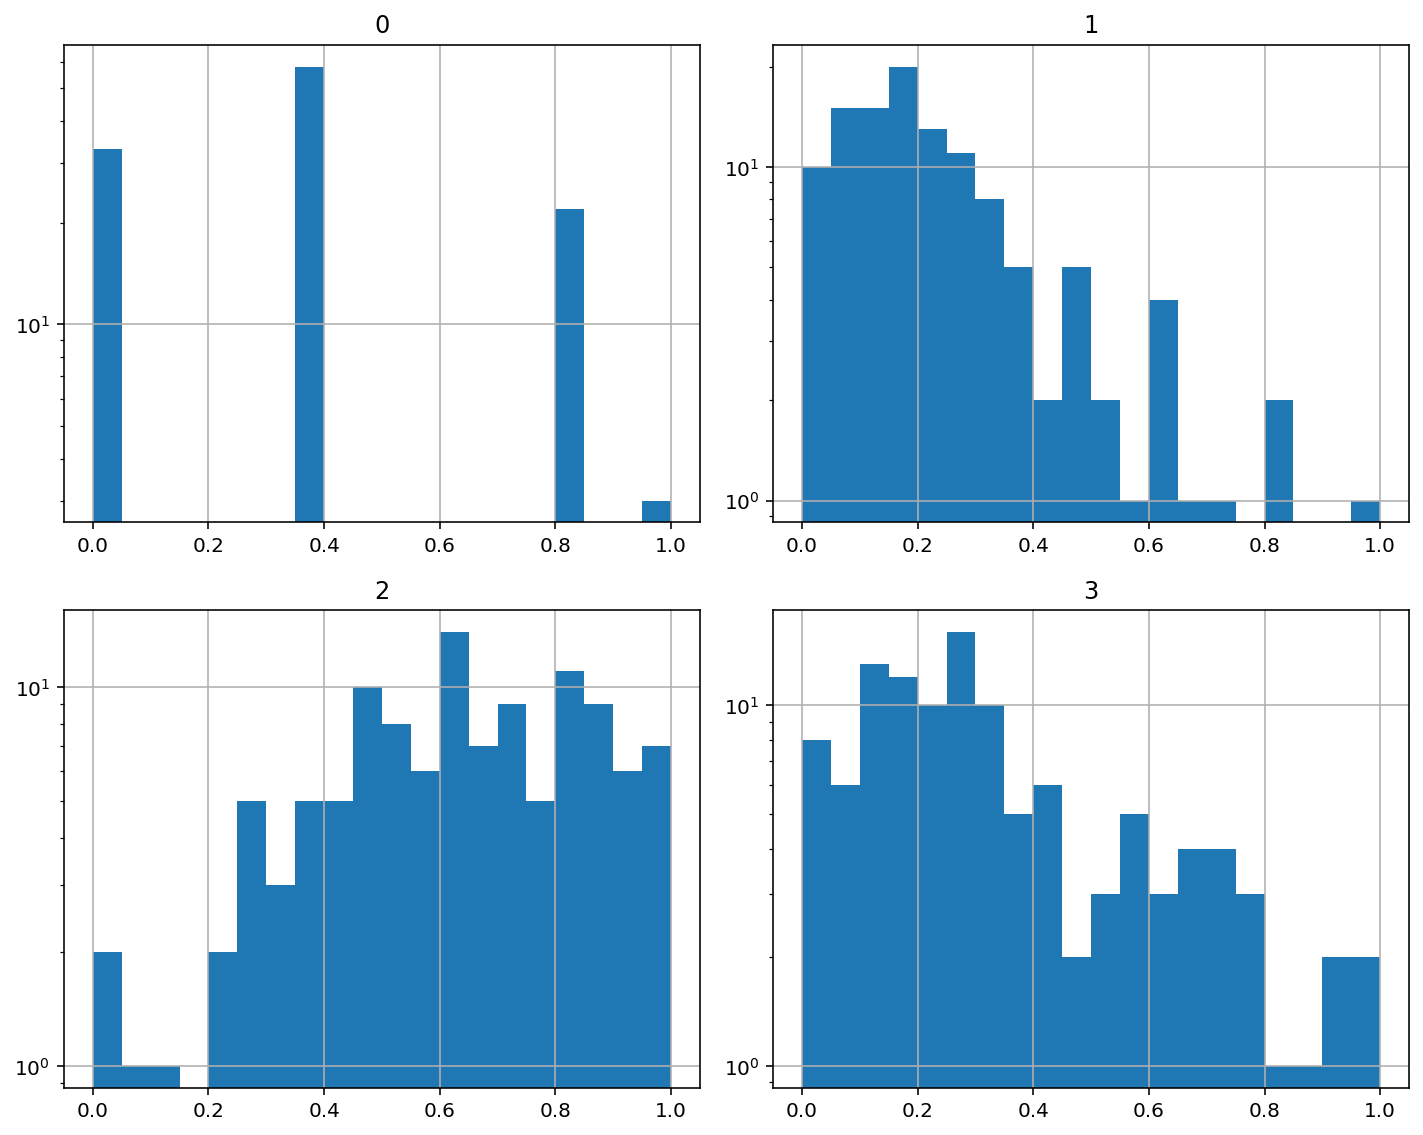

In [34]:
X_train_trans_df = pd.DataFrame(X_train_trans_np)
X_train_trans_df.hist(bins=20, 
            figsize=(10,8), 
            log=True,
           )

plt.tight_layout()
plt.show()

checking out the features variances and drop them based on the column variances.

>Threshold=0.00, Features=4
>Threshold=0.01, Features=4
>Threshold=0.02, Features=4
>Threshold=0.03, Features=4
>Threshold=0.04, Features=3
>Threshold=0.05, Features=3
>Threshold=0.06, Features=1
>Threshold=0.07, Features=1
>Threshold=0.08, Features=1


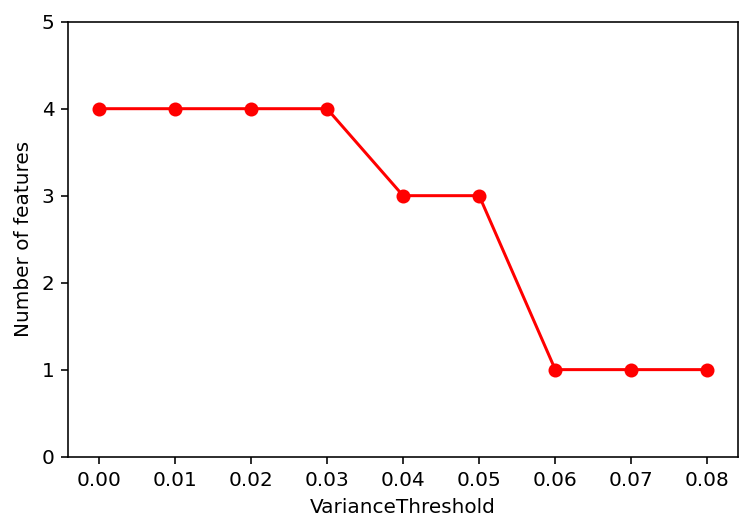

In [35]:
# define thresholds to check
thresholds = np.arange(0.0, 0.09, 0.01)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X_train_trans_df)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
plt.plot(thresholds, results, 'ro-')
plt.xlabel('VarianceThreshold')
plt.ylabel('Number of features')
plt.ylim(0,5)
plt.show()

I decide to no applying the features selection based on the feature variance.

# MinMax & PowerTransformer on training data

Transfer columns to gaussian or more gaussian distribution

In [36]:
# prepare the model with input scaling and power transform
steps = list()
steps.append(('scale', MinMaxScaler(feature_range=(1e-5,1))))
steps.append(('power', PowerTransformer()))
pipeline = Pipeline(steps=steps)
trans_np = pipeline.fit_transform(X_train,y_train)

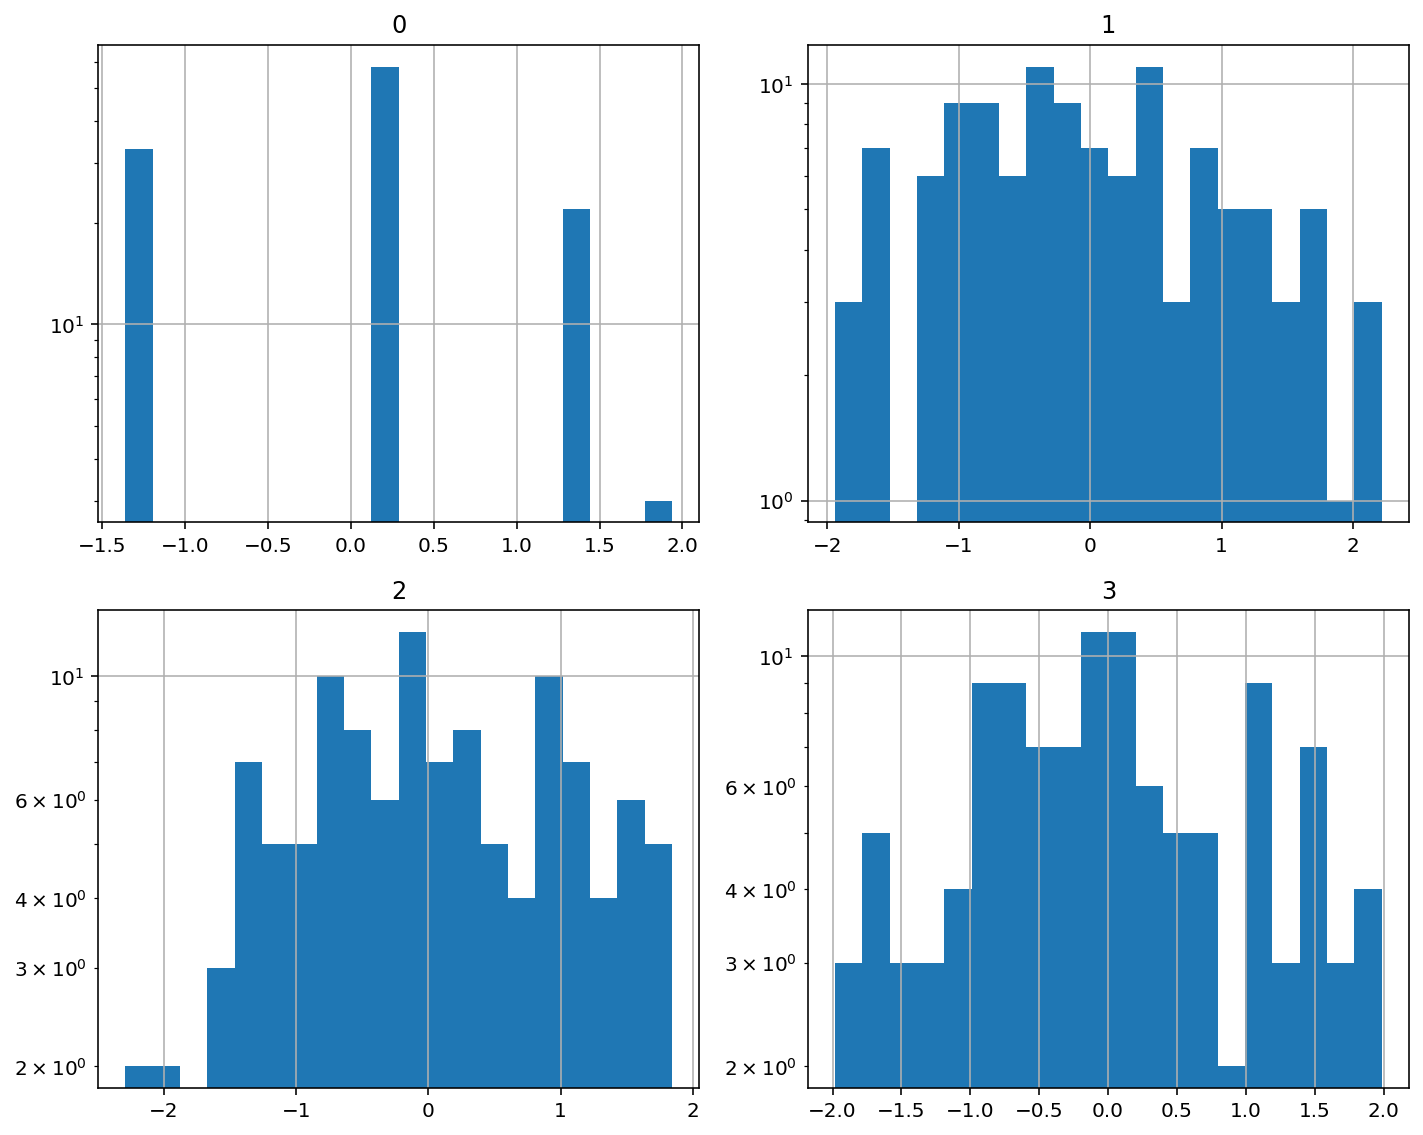

In [37]:
trans_df = pd.DataFrame(trans_np)

trans_df.hist(bins=20, 
            figsize=(10,8), 
            log=True,
           )

plt.tight_layout()
plt.show()

# MinMaxScaler, PowerTransformer & HuberRegressor on training data

In [38]:
steps = list()
steps.append(('scale', MinMaxScaler(feature_range=(1e-5,1))))
steps.append(('power', PowerTransformer()))
steps.append(('model', HuberRegressor()))
pipeline = Pipeline(steps=steps)

In [39]:
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline)

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, 
                         scoring='neg_mean_absolute_error', 
                         cv=cv, n_jobs=-1)

# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 52.311


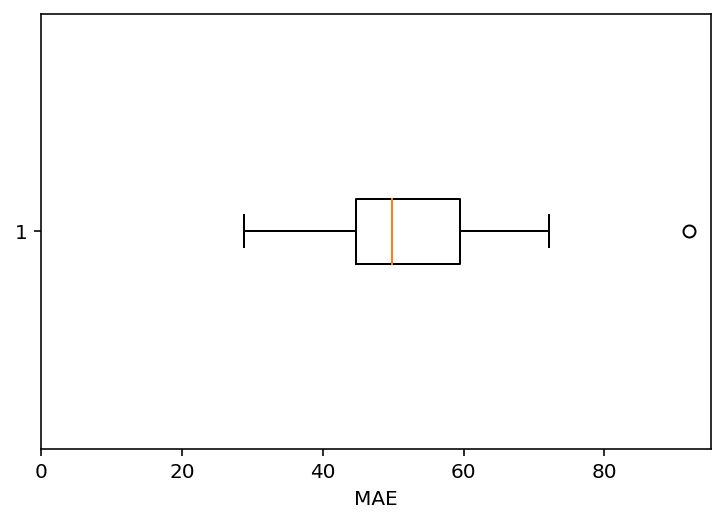

In [40]:
plt.boxplot(scores, vert=False)
plt.xlim(0, )
plt.xlabel('MAE')
plt.show()

# Fit and Predict with whole pipeline

Note that the LOF was applied already on train set (fit) and no need to apply LOF on test.

In [52]:
steps = list()
steps.append(('scale', MinMaxScaler(feature_range=(1e-5,1))))
steps.append(('power', PowerTransformer()))
steps.append(('model', HuberRegressor(max_iter=150)))
pipeline = Pipeline(steps=steps)

In [53]:
# fit pipeline
pipeline.fit(X_train, y_train)
# make predictions
yhat = pipeline.predict(X_test)

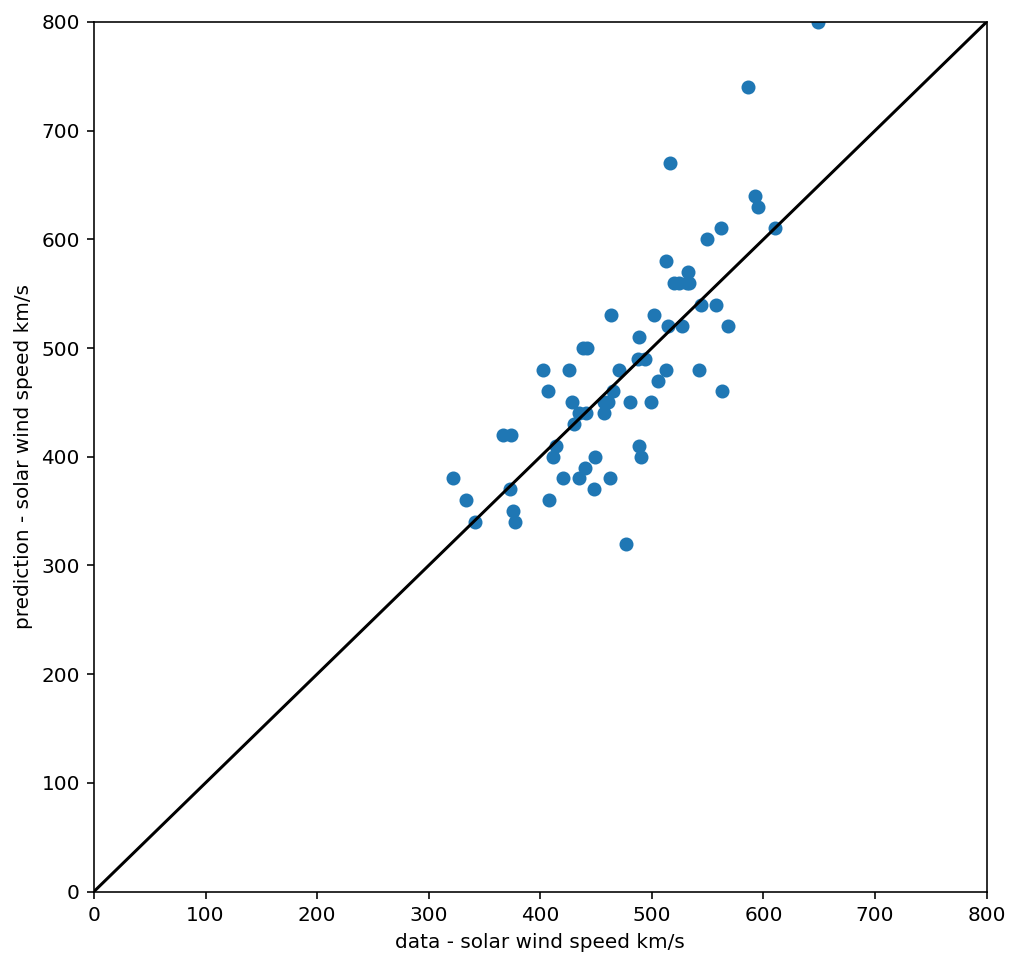

In [54]:
plt.figure(figsize=(8,8))
plt.scatter(yhat, y_test)
plt.ylabel('prediction - solar wind speed km/s')
plt.xlabel('data - solar wind speed km/s')
plt.axline([0, 0], [800, 800], color ='k')
plt.xlim(0, 800)
plt.ylim(0, 800)
plt.show()

In [56]:
print('r2_score ', r2_score(yhat, y_test))
print('mean_absolute_error ', mean_absolute_error(yhat, y_test))

r2_score  0.32931197852755856
mean_absolute_error  43.29334114310833


In [61]:
from sklearn.linear_model import LinearRegression, Perceptron, Lasso

In [82]:
def Apply_models(model, model_name):
    



    steps = list()
    steps.append(('scale', MinMaxScaler(feature_range=(1e-5,1))))
    steps.append(('power', PowerTransformer()))
    steps.append(('model', model()))
    pipeline = Pipeline(steps=steps)


    # fit pipeline
    pipeline.fit(X_train, y_train)
    # make predictions
    yhat = pipeline.predict(X_test)


#     plt.figure(figsize=(8,8))
#     plt.scatter(yhat, y_test)
#     plt.ylabel('prediction - solar wind speed km/s')
#     plt.xlabel('data - solar wind speed km/s')
#     plt.axline([0, 0], [800, 800], color ='k')
#     plt.xlim(0, 800)
#     plt.ylim(0, 800)
#     plt.show()
    print(model_name)
    print('r2_score ', r2_score(yhat, y_test))
    print('mean_absolute_error ', mean_absolute_error(yhat, y_test))

In [84]:
model_list = [LinearRegression, Perceptron, Lasso]
model_name_list = ['LinearRegression', 'Perceptron', 'Lasso']
for i, model in enumerate(model_list):
    Apply_models(model, model_name_list[i])
    print(50*'+')
    

LinearRegression
r2_score  0.4479068699875669
mean_absolute_error  44.480061508345244
++++++++++++++++++++++++++++++++++++++++++++++++++
Perceptron
r2_score  -0.09276916964640436
mean_absolute_error  68.59375
++++++++++++++++++++++++++++++++++++++++++++++++++
Lasso
r2_score  0.4423083744782046
mean_absolute_error  44.29940110238456
++++++++++++++++++++++++++++++++++++++++++++++++++
